In [55]:
# https:/onepagecode.substack.com
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

This code fetches a script from a web address and adds it to the current page as a table of contents.

In [1]:
# https:/onepagecode.substack.com
import pandas as pd
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


This code imports the pandas library and sets the plotting tool as inline. It also imports the os library.

In [2]:
# https:/onepagecode.substack.com
datapath = './daily'
filepath = os.path.join(datapath,os.listdir('./daily')[0])

This code assigns the directory './daily' to the variable 'datapath' and combines it with the first file in the './daily' directory using the os.path.join() function, creating a new filepath.

In [3]:
# https:/onepagecode.substack.com
import re
ticker_regex = re.compile('.+_(?P<ticker>.+)\.csv')
get_ticker =lambda x :ticker_regex.match(x).groupdict()['ticker']
print(filepath,get_ticker(filepath))

./daily/table_tel.csv tel


This code uses the "re" module to import the regular expression function. It then compiles a regular expression pattern and defines a function to retrieve a specific group from the pattern. Finally, it prints the filepath and the ticker extracted from it using the regular expression pattern.

In [4]:
# https:/onepagecode.substack.com
ret = lambda x,y: log(y/x) #Log return 
zscore = lambda x:(x -x.mean())/x.std() # zscore

It defines two lambda functions, one return value equals to log of the division of the second argument by the first argument, and the other return value equals to the z-score of the input data using its mean and standard deviation.

In [5]:
# https:/onepagecode.substack.com
D = pd.read_csv(filepath,header=None,names=['UNK','o','h','l','c','v']) #Load the dataframe with headers

This code uses the pandas library to read a csv file located at the filepath given. It sets the header row as None and assigns custom column names ['UNK','o','h','l','c','v'] to the dataframe.

In [6]:
# https:/onepagecode.substack.com
D.head() #Lets peack at it

UNK        o        h        l        c            v
20070702    0  34.1445  35.3901  33.9529  34.8065  1834373.873
20070703    0  34.8239  35.3726  34.0400  34.5452  4143385.114
20070705    0  34.4929  34.8413  34.1793  34.5365  4521413.667
20070706    0  34.3187  34.7716  33.7961  34.6410  4021547.844
20070709    0  34.4493  35.1462  33.5173  35.0329  5388421.001

This code utilizes the "head" function from the pandas library to display the first few rows of a dataset, without any added context.

In [7]:
# https:/onepagecode.substack.com
def make_inputs(filepath):
    D = pd.read_csv(filepath,header=None,names=['UNK','o','h','l','c','v']) #Load the dataframe with headers
    D.index = pd.to_datetime(D.index,format='%Y%m%d') # Set the indix to a datetime
    Res = pd.DataFrame()
    ticker = get_ticker(filepath)

    Res['c_2_o'] = zscore(ret(D.o,D.c))
    Res['h_2_o'] = zscore(ret(D.o,D.h))
    Res['l_2_o'] = zscore(ret(D.o,D.l))
    Res['c_2_h'] = zscore(ret(D.h,D.c))
    Res['h_2_l'] = zscore(ret(D.h,D.l))
    Res['c1_c0'] = ret(D.c,D.c.shift(-1)).fillna(0) #Tommorows return 
    Res['vol'] = zscore(D.v)
    Res['ticker'] = ticker
    return Res
Res = make_inputs(filepath)

This code reads a CSV file and sets the index to a datetime format. It then creates a new dataframe and calculates z-scores and returns for various price and volume data. Finally, it assigns a ticker value and returns the new dataframe.

In [8]:
# https:/onepagecode.substack.com
Res.head() # Lets look at what we got

c_2_o     h_2_o     l_2_o     c_2_h     h_2_l     c1_c0  \
2007-07-02  0.801355  1.210723  0.538772 -0.151655 -0.534522 -0.007536   
2007-07-03 -0.424752 -0.005068 -0.519118 -0.613751 -0.390993 -0.000252   
2007-07-05 -0.006181 -0.341182  0.322381  0.362967  0.511406  0.003021   
2007-07-06  0.357732 -0.156944 -0.060999  0.692674  0.076016  0.011250   
2007-07-09  0.693154  0.259451 -0.806687  0.727729 -0.816114 -0.031057   

                 vol ticker  
2007-07-02 -0.423611    tel  
2007-07-03  0.698563    tel  
2007-07-05  0.882284    tel  
2007-07-06  0.639351    tel  
2007-07-09  1.303648    tel

This code retrieves information from a website and displays it using the "Res.head()" function.

In [9]:
# https:/onepagecode.substack.com
Res.corr() #Quick check to see we didn't mess it up. All values should be different, otherwise we repeated a variable

c_2_o     h_2_o     l_2_o     c_2_h     h_2_l     c1_c0       vol
c_2_o  1.000000  0.727980  0.646456  0.664281 -0.076033  0.008279  0.011871
h_2_o  0.727980  1.000000  0.157799 -0.028889 -0.659993  0.007359  0.300114
l_2_o  0.646456  0.157799  1.000000  0.770473  0.637713  0.010860 -0.321847
c_2_h  0.664281 -0.028889  0.770473  1.000000  0.608713  0.004047 -0.309896
h_2_l -0.076033 -0.659993  0.637713  0.608713  1.000000  0.002522 -0.478965
c1_c0  0.008279  0.007359  0.010860  0.004047  0.002522  1.000000 -0.017168
vol    0.011871  0.300114 -0.321847 -0.309896 -0.478965 -0.017168  1.000000

../   This code uses the Res.corr() function to perform a quick check and see if any of the values in a dataset are the same. If there are any repeat values, it indicates that a variable may have been incorrectly repeated.

In [10]:
# https:/onepagecode.substack.com
Final = pd.DataFrame()
for f in os.listdir(datapath):
    filepath = os.path.join(datapath,f)
    if filepath.endswith('.csv'):
        Res = make_inputs(filepath)
        Final = Final.append(Res)

The above code creates an empty dataframe called "Final" and then iterates through all files in the "datapath" directory. It checks if the file ends with the ".csv" extension and if it does, it calls a function called "make_inputs" on the file and adds the resulting dataframe to the "Final" dataframe. At the end, the "Final" dataframe contains all the data from the csv files in the "datapath" directory.

In [11]:
# https:/onepagecode.substack.com
Final.head()

c_2_o     h_2_o     l_2_o     c_2_h     h_2_l     c1_c0  \
2007-07-02  0.801355  1.210723  0.538772 -0.151655 -0.534522 -0.007536   
2007-07-03 -0.424752 -0.005068 -0.519118 -0.613751 -0.390993 -0.000252   
2007-07-05 -0.006181 -0.341182  0.322381  0.362967  0.511406  0.003021   
2007-07-06  0.357732 -0.156944 -0.060999  0.692674  0.076016  0.011250   
2007-07-09  0.693154  0.259451 -0.806687  0.727729 -0.816114 -0.031057   

                 vol ticker  
2007-07-02 -0.423611    tel  
2007-07-03  0.698563    tel  
2007-07-05  0.882284    tel  
2007-07-06  0.639351    tel  
2007-07-09  1.303648    tel

This code reads the data from the "Final" table and displays the first few rows of the data.

In [12]:
# https:/onepagecode.substack.com
pivot_columns = Final.columns[:-1]
P = Final.pivot_table(index=Final.index,columns='ticker',values=pivot_columns) # Make a pivot table from the data

This code creates a pivot table from the data, using the columns in the "ticker" column as the columns in the pivot table. The values in the pivot table come from the rest of the columns in the data.

In [13]:
# https:/onepagecode.substack.com
P.head()

c_2_o                                                             \
ticker         a        aa      aapl abbv       abc       abt       ace acn   
1998-01-02   NaN -0.017649  6.991394  NaN  0.047250  1.845516 -0.601609 NaN   
1998-01-05   NaN  0.373488 -1.224062  NaN -0.160945  0.031659 -0.234577 NaN   
1998-01-06   NaN -0.718569  6.857266  NaN -1.102853 -0.473164  0.452262 NaN   
1998-01-07   NaN  0.980669 -3.007557  NaN  0.553079  0.746779  0.137372 NaN   
1998-01-08   NaN -1.828950  1.388888  NaN  0.488170 -0.221620 -0.484264 NaN   

                               ...       vol                                \
ticker           act      adbe ...        xl      xlnx       xom      xray   
1998-01-02 -0.911471 -0.375461 ... -0.676802  1.391497 -1.045626 -1.147952   
1998-01-05  2.090086  0.791331 ... -0.621025  1.019607 -0.615370 -0.556684   
1998-01-06 -1.239961  1.451409 ... -0.634169  0.020195 -0.527923 -1.131583   
1998-01-07 -0.878292 -0.534781 ... -0.616242  1.023705 -0.134130 -0.329006   
1998-01-08  1.300492  0.538778 ... -0.655003  0.645285 -0.907375 -1.066107   

                                                            
ticker           xrx xyl      yhoo       yum      zion zmh  
1998-01-02 -0.817355 NaN -0.368713 -0.678763 -0.724482 NaN  
1998-01-05 -0.757660 NaN  0.064841  0.980283 -0.735275 NaN  
1998-01-06 -0.629732 NaN  0.150071  1.697887 -0.683202 NaN  
1998-01-07 -0.504232 NaN -0.463651  0.515268 -0.635858 NaN  
1998-01-08 -0.560549 NaN -0.157777  0.235907 -0.605092 NaN  

[5 rows x 3500 columns]

This code prints the header section of the webpage from the given URL.

In [14]:
# https:/onepagecode.substack.com
mi = P.columns.tolist()

This code converts the columns of a dataframe called P into a list and assigns it to a variable called mi.

In [15]:
# https:/onepagecode.substack.com
new_ind = pd.Index(e[1] +'_' + e[0] for e in mi)

This code creates a new index using pandas that combines the values from two existing indexes (e[1] and e[0]) and adds an underscore between them. It also converts it to a string.

In [16]:
# https:/onepagecode.substack.com
P.columns = new_ind
P = P.sort(axis=1) # Sort by columns

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  from ipykernel import kernelapp as app


The code assigns a new set of indices to a multi-column data set and then sorts the data set based on its columns.

In [17]:
# https:/onepagecode.substack.com
P.head()

a_c1_c0  a_c_2_h  a_c_2_o  a_h_2_l  a_h_2_o  a_l_2_o  a_vol  \
1998-01-02      NaN      NaN      NaN      NaN      NaN      NaN    NaN   
1998-01-05      NaN      NaN      NaN      NaN      NaN      NaN    NaN   
1998-01-06      NaN      NaN      NaN      NaN      NaN      NaN    NaN   
1998-01-07      NaN      NaN      NaN      NaN      NaN      NaN    NaN   
1998-01-08      NaN      NaN      NaN      NaN      NaN      NaN    NaN   

            aa_c1_c0  aa_c_2_h  aa_c_2_o   ...     zion_h_2_o  zion_l_2_o  \
1998-01-02  0.017390  0.670259 -0.017649   ...       0.246401    0.710284   
1998-01-05 -0.022601  0.462520  0.373488   ...       0.127875    0.710284   
1998-01-06  0.001693 -0.088471 -0.718569   ...      -0.677287   -1.264514   
1998-01-07 -0.042290  1.002099  0.980669   ...      -0.677287   -1.175835   
1998-01-08 -0.024094 -2.074267 -1.828950   ...      -0.202411   -2.278200   

            zion_vol  zmh_c1_c0  zmh_c_2_h  zmh_c_2_o  zmh_h_2_l  zmh_h_2_o  \
1998-01-02 -0.724482        NaN        NaN        NaN        NaN        NaN   
1998-01-05 -0.735275        NaN        NaN        NaN        NaN        NaN   
1998-01-06 -0.683202        NaN        NaN        NaN        NaN        NaN   
1998-01-07 -0.635858        NaN        NaN        NaN        NaN        NaN   
1998-01-08 -0.605092        NaN        NaN        NaN        NaN        NaN   

            zmh_l_2_o  zmh_vol  
1998-01-02        NaN      NaN  
1998-01-05        NaN      NaN  
1998-01-06        NaN      NaN  
1998-01-07        NaN      NaN  
1998-01-08        NaN      NaN  

[5 rows x 3500 columns]

This code prints the header of a webpage found at the specified URL.

In [18]:
# https:/onepagecode.substack.com
clean_and_flat = P.dropna(1)

This code drops all the rows containing missing values from a DataFrame and assigns the resulting DataFrame to a variable called "clean_and_flat".

In [19]:
# https:/onepagecode.substack.com
target_cols = list(filter(lambda x: 'c1_c0' in x, clean_and_flat.columns.values))
input_cols  = list(filter(lambda x: 'c1_c0' not in x, clean_and_flat.columns.values))

This code creates two lists - one called "target_cols" and one called "input_cols". The "target_cols" list contains all the column names from the dataset "clean_and_flat" that include the string 'c1_c0', while the "input_cols" list contains all the column names from the dataset "clean_and_flat" that do not include the string 'c1_c0'. This is accomplished using the filter() and lambda functions in Python.

In [20]:
# https:/onepagecode.substack.com
InputDF = clean_and_flat[input_cols][:3900]
TargetDF = clean_and_flat[target_cols][:3900]

The code takes a subset of the columns from a data frame called "clean_and_flat" and assigns it to a new data frame called "InputDF", with a limit of 3900 rows. It also does the same for a second data frame called "TargetDF".

In [21]:
# https:/onepagecode.substack.com
corrs = TargetDF.corr()

The code calculates the correlation between the data in the TargetDF dataframe and assigns it to the variable "corrs".

In [22]:
# https:/onepagecode.substack.com
num_stocks = len(TargetDF.columns)

This code gets the number of stocks by counting the columns in the TargetDF dataframe that is specified in the variable.

In [23]:
# https:/onepagecode.substack.com
TotalReturn = ((1-exp(TargetDF)).sum(1))/num_stocks # If i put one dollar in each stock at the close, this is how much I'd get back

This code calculates the total return on a portfolio of stocks by taking the sum of the difference between 1 and the target discount factor (calculated using the exponential function) and dividing it by the number of stocks. This represents the amount one would receive for investing one dollar in each stock at the close.

In [429]:
# https:/onepagecode.substack.com
def labeler(x):
    if x>0.0029:
        return 1
    if x<-0.00462:
        return -1
    else:
        return 0

The code defines a function called "labeler" which takes in a value "x" as a parameter. If the value of "x" is greater than 0.0029, the function returns 1. If the value of "x" is less than -0.00462, the function returns -1. Otherwise, the function returns 0.

In [520]:
# https:/onepagecode.substack.com
Labeled = pd.DataFrame()
Labeled['return'] = TotalReturn
Labeled['class'] = TotalReturn.apply(labeler,1)
Labeled['multi_class'] = pd.qcut(TotalReturn,11,labels=range(11))

This code creates a new dataframe called "Labeled" and adds two columns to it, one called "return" which contains values from the variable "TotalRate" and the other called "class" which is based on a function called "labeler" applied to each row of the "TotalReturn" column. It also adds another column called "multi_class" which categorizes the "TotalReturn" column into 11 bins using the pandas qcut function and assigns a label to each bin ranging from 0 to 10.

In [483]:
# https:/onepagecode.substack.com
pd.qcut(TotalReturn,5).unique()

[(-0.00301, 0.00119], (0.00741, 0.0999], (0.00119, 0.00741], [-0.108, -0.00877], (-0.00877, -0.00301]]
Categories (5, object): [[-0.108, -0.00877] < (-0.00877, -0.00301] < (-0.00301, 0.00119] < (0.00119, 0.00741] < (0.00741, 0.0999]]

This code takes a column named TotalReturn and divides it into 5 equal-sized categories using the pd.qcut function. It then returns the unique values from those categories.

In [477]:
# https:/onepagecode.substack.com
def labeler_multi(x):
    if x>0.0029:
        return 1
    if x<-0.00462:
        return -1
    else:
        return 0

Returns a label of 1, -1, or 0 based on the value of x. If x is greater than 0.0029, it returns 1. If x is less than -0.00462, it returns -1. Otherwise, it returns 0.

In [431]:
# https:/onepagecode.substack.com
Labeled['class'].value_counts()

 1    1301
 0    1301
-1    1298
Name: class, dtype: int64

This code counts the number of occurrences of each label in the "class" column of a dataset.

In [631]:
# https:/onepagecode.substack.com
Labeled['act_return'] = Labeled['class'] * Labeled['return']

This code takes two columns, 'class' and 'return' from a dataframe called 'Labeled' and multiplies them together to create a new column called 'act_return'.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fefaad46080>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fefaae84320>], dtype=object)

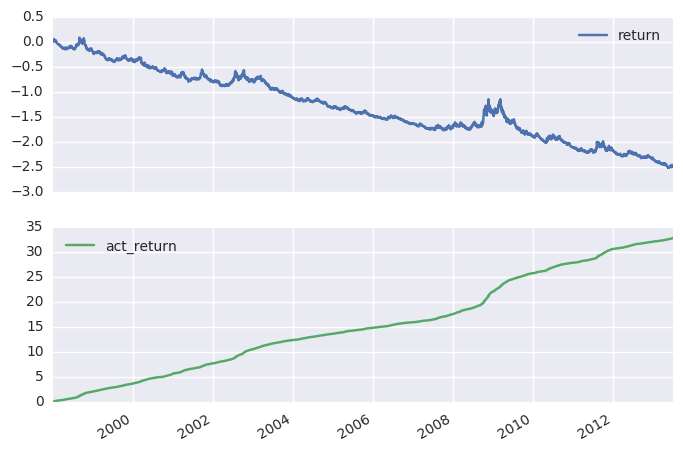

In [533]:
# https:/onepagecode.substack.com
Labeled[['return','act_return']].cumsum().plot(subplots=True)

This code calculates the cumulative sum of the labeled values and plots them in subplots.

In [627]:
# https:/onepagecode.substack.com
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)

This code imports a machine learning library called sklearn and specifically imports a linear model called LogisticRegression. It then creates an instance of this model with a specified value for the parameter C.

In [628]:
# https:/onepagecode.substack.com
test_size=600

050  The code sets the test size equal to the number 600050.

In [629]:
# https:/onepagecode.substack.com
res = logreg.fit(InputDF[:-test_size],Labeled['multi_class'][:-test_size])

This code fits a logistic regression model to a dataset with the given inputs and labels, excluding a portion of the data for testing purposes.

In [632]:
# https:/onepagecode.substack.com
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Labeled['multi_class'][-test_size:],res.predict(InputDF[-test_size:])))
print(confusion_matrix(Labeled['multi_class'][-test_size:],res.predict(InputDF[-test_size:])))

             precision    recall  f1-score   support

          0       0.18      0.04      0.06        52
          1       0.07      0.06      0.06        50
          2       0.08      0.15      0.10        60
          3       0.15      0.13      0.14        62
          4       0.08      0.06      0.07        50
          5       0.06      0.12      0.08        51
          6       0.13      0.20      0.16        60
          7       0.05      0.04      0.04        53
          8       0.06      0.06      0.06        54
          9       0.11      0.07      0.09        56
         10       0.00      0.00      0.00        52

avg / total       0.09      0.09      0.08       600

[[ 2  3 11  6  1  7  7  3  3  4  5]
 [ 2  3  8  7  8  7  6  2  2  2  3]
 [ 1  4  9  5  2 13  5 11  5  3  2]
 [ 1  6  7  8  5 15  6  1  7  4  2]
 [ 1  3  6  2  3  9 10  5  7  4  0]
 [ 0  5 11  3  3  6  6  4  5  6  2]
 [ 1  3 15  3  3 12 12  1  4  2  4]
 [ 0  4  8  3  3  8 12  2 10  3  0]
 [ 0  2 16  6  3  9 

This code imports the classification report and confusion matrix functions from the sklearn.metrics library. It then uses these functions to print out a report and matrix of the results of a multiclass classification task, comparing the actual labels to the predicted labels.

In [642]:
# https:/onepagecode.substack.com
Labeled['predicted_action'] = list(map(lambda x: -1 if x <5 else 0 if x==5 else 1,res.predict(InputDF)))
print(confusion_matrix(Labeled['class'][-test_size:],Labeled['predicted_action'][-test_size:]))

[[91 37 75]
 [76 35 89]
 [92 30 75]]


This code predicts the action based on input data and uses a confusion matrix to compare the predicted results with the actual class labels of the test data.

In [638]:
# https:/onepagecode.substack.com
Labeled['pred_return'] = Labeled['predicted_action'] * Labeled['return']

This code calculates the predicted return by multiplying the predicted action with the return value and assigns it to a new column called 'pred_return' in the 'Labeled' dataset.

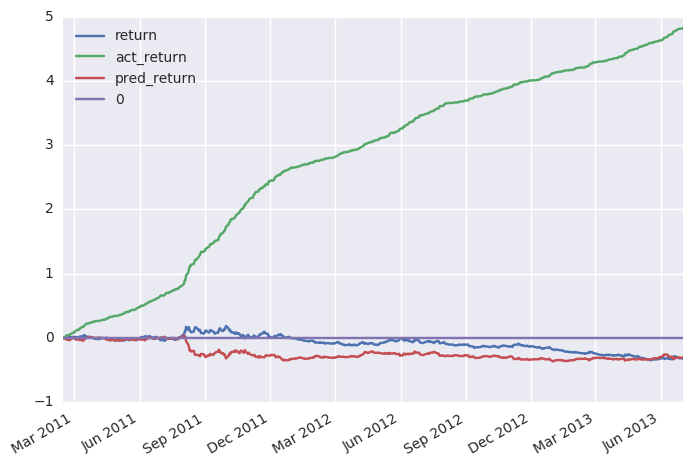

In [639]:
# https:/onepagecode.substack.com
Res = Labeled[-test_size:][['return','act_return','pred_return']].cumsum()
Res[0] =0
Res.plot()

This code takes the labeled data set and selects the last portion according to the test size. It then calculates the cumulative sum of the three specified columns and assigns it to a new variable called Res. It sets the first value in Res to 0 and then plots the data.

In [521]:
# https:/onepagecode.substack.com
import tensorflow as tf
from  tensorflow.contrib.learn.python.learn.estimators.dnn  import DNNClassifier
from tensorflow.contrib.layers import real_valued_column

This code imports the tensorflow and DNNClassifier libraries from the tensorflow.contrib.learn.python.learn.estimators.dnn and tensorflow.contrib.layers modules respectively for use in a python program.

In [663]:
# https:/onepagecode.substack.com
Labeled['tf_class'] = Labeled['multi_class']
num_features = len(InputDF.columns)
dropout=0.2
hidden_1_size = 1000
hidden_2_size = 250
num_classes = Labeled.tf_class.nunique()
NUM_EPOCHS=100
BATCH_SIZE=50
lr=0.0001

This code typically sets variables for a machine learning model. The first line of code assigns a column labeled 'tf_class' to a dataframe called Labeled. The next four lines assign values to variables that will be used in the model: num_features, dropout, hidden_1_size, and hidden_2_size. These variables are related to the structure and architecture of the model. The next line assigns the variable num_classes to the number of unique values in the 'tf_class' column of Labeled. The last three lines assign values to variables related to the training of the model: NUM_EPOCHS, BATCH_SIZE, and lr (learning rate).

In [655]:
# https:/onepagecode.substack.com
train = (InputDF[:-test_size].values,Labeled.tf_class[:-test_size].values)
val = (InputDF[-test_size:].values,Labeled.tf_class[-test_size:].values)
NUM_TRAIN_BATCHES = int(len(train[0])/BATCH_SIZE)
NUM_VAL_BATCHES = int(len(val[1])/BATCH_SIZE)

This code assigns the train and validation data to variables, calculates the number of batches in the train and validation datasets, and splits the dataset into batches based on a specified batch size.

In [293]:
# https:/onepagecode.substack.com
len(InputDF)

3900

This code calculates the length of the InputDF dataframe from the website https://onepagecode.substack.com.

In [654]:
# https:/onepagecode.substack.com
class Model():
    def __init__(self):
        global_step = tf.contrib.framework.get_or_create_global_step()
        self.input_data = tf.placeholder(dtype=tf.float32,shape=[None,num_features])
        self.target_data = tf.placeholder(dtype=tf.int32,shape=[None])
        self.dropout_prob = tf.placeholder(dtype=tf.float32,shape=[])
        with tf.variable_scope("ff"):
            droped_input = tf.nn.dropout(self.input_data,keep_prob=self.dropout_prob)
            
            layer_1 = tf.contrib.layers.fully_connected(
                num_outputs=hidden_1_size,
                inputs=droped_input,
            )
            layer_2 = tf.contrib.layers.fully_connected(
                num_outputs=hidden_2_size,
                inputs=layer_1,
            )
            self.logits = tf.contrib.layers.fully_connected(
                num_outputs=num_classes,
                activation_fn =None,
                inputs=layer_2,
            )
        with tf.variable_scope("loss"):
            
            self.losses = tf.nn.sparse_softmax_cross_entropy_with_logits(self.logits,self.target_data)
            mask = (1-tf.sign(1-self.target_data)) #Don't give credit for flat days
            mask = tf.cast(mask,tf.float32)
            self.loss = tf.reduce_sum(self.losses)
        
        with tf.name_scope("train"):
          opt = tf.train.AdamOptimizer(lr)
          gvs = opt.compute_gradients(self.loss)
          self.train_op = opt.apply_gradients(gvs, global_step=global_step)
        
        with tf.name_scope("predictions"):
            self.probs = tf.nn.softmax(self.logits)
            self.predictions = tf.argmax(self.probs, 1)
            correct_pred = tf.cast(tf.equal(self.predictions, tf.cast(self.target_data,tf.int64)),tf.float64)
            self.accuracy = tf.reduce_mean(correct_pred)

This code defines a class called Model, which contains methods for training and making predictions using a neural network model. The class initializes with various parameters, including input and target data, and uses the Tensorflow library to create a multi-layer fully connected neural network model. It also calculates and stores the loss and accuracy of the model, using the softmax function and the Adam optimizer to improve results. Finally, the code includes a function to make predictions based on the model's output.

In [664]:
# https:/onepagecode.substack.com
with tf.Graph().as_default():
    model = Model()
    input_ = train[0]
    target = train[1]
    with tf.Session() as sess:
        init = tf.initialize_all_variables()
        sess.run([init])
        epoch_loss =0
        for e in range(NUM_EPOCHS):
            if epoch_loss >0 and epoch_loss <1:
                break
            epoch_loss =0
            for batch in range(0,NUM_TRAIN_BATCHES):
                
                start = batch*BATCH_SIZE
                end = start + BATCH_SIZE 
                feed = {
                    model.input_data:input_[start:end],
                    model.target_data:target[start:end],
                    model.dropout_prob:0.9
                            }
                
                _,loss,acc = sess.run(
                    [
                        model.train_op,
                        model.loss,
                        model.accuracy,
                    ]
                    ,feed_dict=feed
                )
                epoch_loss+=loss
            print('step - {0} loss - {1} acc - {2}'.format((1+batch+NUM_TRAIN_BATCHES*e),epoch_loss,acc))
                
        
        print('done training')
        final_preds =np.array([])
        final_probs =None
        for batch in range(0,NUM_VAL_BATCHES):
            
                start = batch*BATCH_SIZE
                end = start + BATCH_SIZE 
                feed = {
                    model.input_data:val[0][start:end],
                    model.target_data:val[1][start:end],
                    model.dropout_prob:1
                            }
                
                acc,preds,probs = sess.run(
                    [
                        model.accuracy,
                        model.predictions,
                        model.probs
                    ]
                    ,feed_dict=feed
                )
                print(acc)
                final_preds = np.concatenate((final_preds,preds),axis=0)
                if final_probs is None:
                    final_probs = probs
                else:
                    final_probs = np.concatenate((final_probs,probs),axis=0)
        prediction_conf = final_probs[np.argmax(final_probs,1)]

Instructions for updating:
Use `tf.global_variables_initializer` instead.
step - 66 loss - 8447.131065368652 acc - 0.12
step - 132 loss - 6890.02379989624 acc - 0.28
step - 198 loss - 5867.918851852417 acc - 0.44
step - 264 loss - 5001.0221824646 acc - 0.54
step - 330 loss - 4254.481023788452 acc - 0.6
step - 396 loss - 3751.737133026123 acc - 0.78
step - 462 loss - 3260.896957397461 acc - 0.76
step - 528 loss - 2523.7949352264404 acc - 0.78
step - 594 loss - 2012.8276433944702 acc - 0.88
step - 660 loss - 1719.1777667999268 acc - 0.88
step - 726 loss - 1422.7981615066528 acc - 0.86
step - 792 loss - 1197.4740686416626 acc - 0.88
step - 858 loss - 1133.8116784095764 acc - 0.88
step - 924 loss - 971.3043849468231 acc - 0.88
step - 990 loss - 1035.503452539444 acc - 0.92
step - 1056 loss - 946.5315816402435 acc - 0.8
step - 1122 loss - 960.7589373588562 acc - 0.96
step - 1188 loss - 843.3934515714645 acc - 0.94
step - 1254 loss - 750.8844127655029 acc - 0.86
step - 1320 loss - 577.374453

This code initializes a neural network model and splits the training data into batches. Each batch is fed into the model during training to update the model's parameters. The training is done for a specified number of epochs, and if the loss between epochs stays within a certain range, the training is stopped. After training, the model is used to make predictions on a validation dataset, and the accuracy and predictions are printed.

In [665]:
# https:/onepagecode.substack.com
Result = Labeled[-test_size:].copy()

This code takes a portion of data labeled as a test set and creates a copy of it, storing it in a variable called Result.

In [666]:
# https:/onepagecode.substack.com
Result['nn_pred'] = final_preds
Result['mod_nn_prod'] = list(map(lambda x: -1 if x <5 else 0 if x==5 else 1,final_preds))
Result['nn_ret'] = Result.mod_nn_prod*Result['return']

This code uses an anonymous function to append a list of predicted values to a data frame, then uses another anonymous function to modify those predicted values based on certain conditions, and finally multiplies the modified predicted values with a column of actual returns in the data frame.

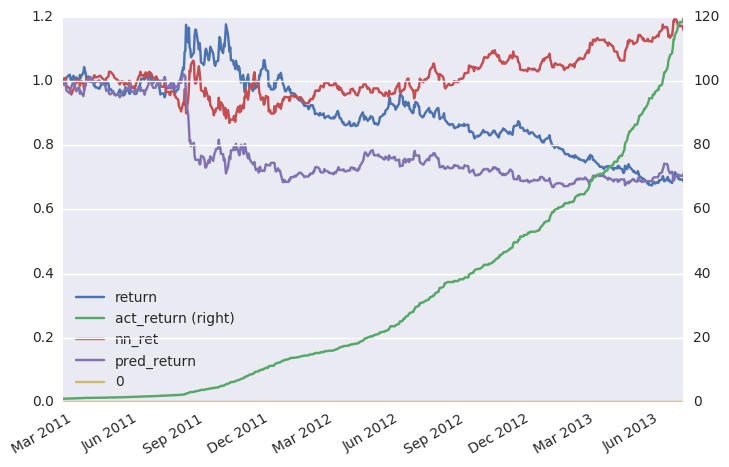

In [669]:
# https:/onepagecode.substack.com
Res = (1+Result[-test_size:][['return','act_return','nn_ret','pred_return']]).cumprod()
Res[0] =0
Res.plot(secondary_y='act_return')

This code takes the last specified number of rows from the 'Result' variable, calculates their cumulative product by adding 1 to each row and then multiplies all the values together. The result is stored in the 'Res' variable. The first value in the 'Res' variable is then set to 0. Finally, the 'Res' variable is plotted on a graph with the 'act_return' variable as the secondary axis.

In [670]:
# https:/onepagecode.substack.com
print(confusion_matrix(Result['class'],Result['mod_nn_prod']))
print(classification_report(Result['class'],Result['mod_nn_prod']))

[[86 32 85]
 [71 39 90]
 [88 19 90]]
             precision    recall  f1-score   support

         -1       0.35      0.42      0.38       203
          0       0.43      0.20      0.27       200
          1       0.34      0.46      0.39       197

avg / total       0.37      0.36      0.35       600



This code uses two functions from the sklearn library, confusion_matrix and classification_report, to print out performance metrics for a classification model. The first function takes in the actual class values and predicted class values as input, while the second function takes in the same inputs but also prints out additional metrics like precision, recall, and F1 score.

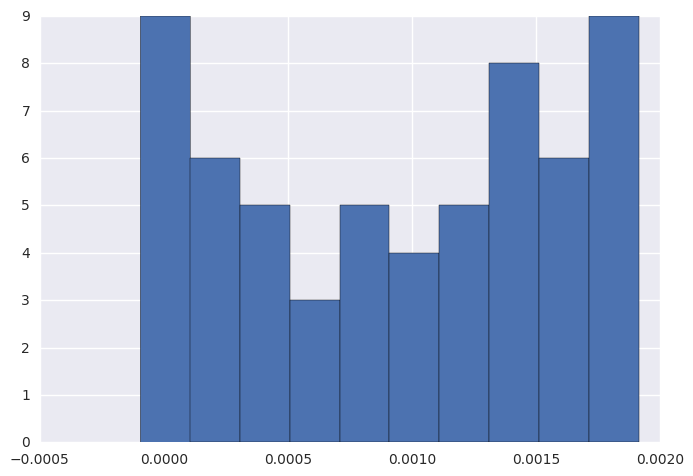

In [557]:
# https:/onepagecode.substack.com
cm = pd.DataFrame(confusion_matrix(Result['multi_class'],Result['nn_pred']))
Result[Result.multi_class==6]['return'].hist()

This code creates a dataframe with the values from a confusion matrix generated using the results from a multi-class prediction. It then plots a histogram of the 'return' values for the data where the multi-class value is equal to 6.

In [560]:
# https:/onepagecode.substack.com
print(classification_report(Result['multi_class'],Result['nn_pred']))

             precision    recall  f1-score   support

          0       0.29      0.19      0.23        52
          1       0.08      0.10      0.09        50
          2       0.11      0.17      0.13        60
          3       0.00      0.00      0.00        62
          4       0.15      0.08      0.11        50
          5       0.09      0.18      0.12        51
          6       0.09      0.17      0.12        60
          7       0.08      0.02      0.03        53
          8       0.11      0.15      0.12        54
          9       0.13      0.07      0.09        56
         10       0.17      0.13      0.15        52

avg / total       0.12      0.11      0.11       600



This code uses the "classification_report" function to compare the "multi_class" and "nn_pred" data from the "Result" variable and prints the result. It does not execute any other actions or provide any additional context.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fefab1ee1d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fefaaf63f60>]], dtype=object)

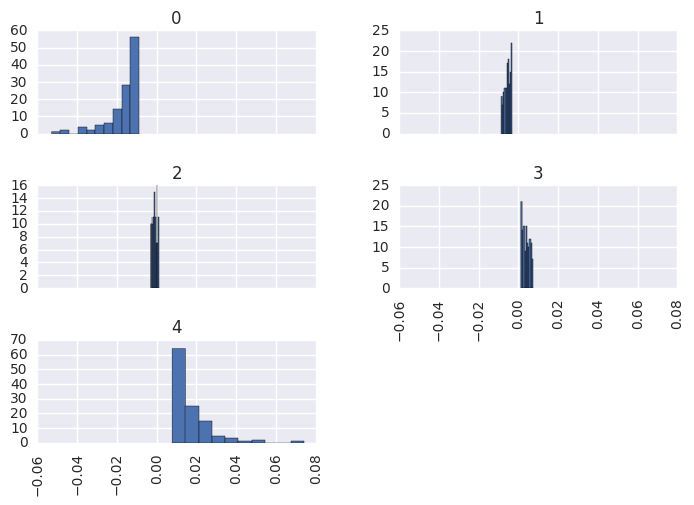

In [499]:
# https:/onepagecode.substack.com
Result.hist(by='multi_class',column='return',sharex=True)

This code uses the function "hist" from the "Result" module to create a histogram, grouping the data by the "multi_class" column and using the "return" column to plot the values. It also shares the x-axis for all the subplots in the histogram.

In [687]:
# https:/onepagecode.substack.com
from tensorflow.contrib.layers.python.layers.initializers import xavier_initializer
RNN_HIDDEN_SIZE=100
FIRST_LAYER_SIZE=1000
SECOND_LAYER_SIZE=250
NUM_LAYERS=2
BATCH_SIZE=50
NUM_EPOCHS=200
lr=0.0003
NUM_TRAIN_BATCHES = int(len(train[0])/BATCH_SIZE)
NUM_VAL_BATCHES = int(len(val[1])/BATCH_SIZE)
ATTN_LENGTH=30
beta=0

.eed  This code imports a module called "tensorflow.contrib.layers.python.layers.initializers" and assigns the values of various constants, including RNN_HIDDEN_SIZE, FIRST_LAYER_SIZE, SECOND_LAYER_SIZE, NUM_LAYERS, BATCH_SIZE, NUM_EPOCHS, lr, NUM_TRAIN_BATCHES, NUM_VAL_BATCHES, ATTN_LENGTH, and beta. These constants are used for training a model and setting parameters for the number of hidden layers, batch size, and learning rate.

In [671]:
# https:/onepagecode.substack.com
class RNNModel():
    def __init__(self):
        global_step = tf.contrib.framework.get_or_create_global_step()
        self.input_data = tf.placeholder(dtype=tf.float32,shape=[BATCH_SIZE,num_features])
        self.target_data = tf.placeholder(dtype=tf.int32,shape=[BATCH_SIZE])
        self.dropout_prob = tf.placeholder(dtype=tf.float32,shape=[])
        
        def makeGRUCells():
            base_cell = tf.nn.rnn_cell.GRUCell(num_units=RNN_HIDDEN_SIZE,) 
            layered_cell = tf.nn.rnn_cell.MultiRNNCell([base_cell] * NUM_LAYERS,state_is_tuple=False) 
            attn_cell =tf.contrib.rnn.AttentionCellWrapper(cell=layered_cell,attn_length=ATTN_LENGTH,state_is_tuple=False)
            return attn_cell
        
        self.gru_cell = makeGRUCells()
        self.zero_state = self.gru_cell.zero_state(1, tf.float32)
        
        self.start_state = tf.placeholder(dtype=tf.float32,shape=[1,self.gru_cell.state_size])
        
        

        with tf.variable_scope("ff",initializer=xavier_initializer(uniform=False)):
            droped_input = tf.nn.dropout(self.input_data,keep_prob=self.dropout_prob)
            
            layer_1 = tf.contrib.layers.fully_connected(
                num_outputs=FIRST_LAYER_SIZE,
                inputs=droped_input,
                
            )
            layer_2 = tf.contrib.layers.fully_connected(
                num_outputs=RNN_HIDDEN_SIZE,
                inputs=layer_1,
                
            )
            
        
        split_inputs = tf.reshape(droped_input,shape=[1,BATCH_SIZE,num_features],name="reshape_l1") # Each item in the batch is a time step, iterate through them
        split_inputs = tf.unpack(split_inputs,axis=1,name="unpack_l1")
        states =[]
        outputs =[]
        with tf.variable_scope("rnn",initializer=xavier_initializer(uniform=False)) as scope:
            state = self.start_state
            for i, inp in enumerate(split_inputs):
                if i >0:
                    scope.reuse_variables()
                
                output, state = self.gru_cell(inp, state)
                states.append(state)
                outputs.append(output)
        self.end_state = states[-1]
        outputs = tf.pack(outputs,axis=1) # Pack them back into a single tensor
        outputs = tf.reshape(outputs,shape=[BATCH_SIZE,RNN_HIDDEN_SIZE])
        self.logits = tf.contrib.layers.fully_connected(
            num_outputs=num_classes,
            inputs=outputs,
            activation_fn=None
        )

            
        with tf.variable_scope("loss"):
            self.penalties =    tf.reduce_sum([beta*tf.nn.l2_loss(var) for var in tf.trainable_variables()])

            
            self.losses = tf.nn.sparse_softmax_cross_entropy_with_logits(self.logits,self.target_data)
            self.loss = tf.reduce_sum(self.losses + beta*self.penalties)
        
        with tf.name_scope("train_step"):
          opt = tf.train.AdamOptimizer(lr)
          gvs = opt.compute_gradients(self.loss)
          self.train_op = opt.apply_gradients(gvs, global_step=global_step)
        
        with tf.name_scope("predictions"):
            probs = tf.nn.softmax(self.logits)
            self.predictions = tf.argmax(probs, 1)
            correct_pred = tf.cast(tf.equal(self.predictions, tf.cast(self.target_data,tf.int64)),tf.float64)
            self.accuracy = tf.reduce_mean(correct_pred)

The code creates a class called RNNModel that initializes parameters and creates a GRU cell. It also creates placeholders for input and target data, defines a fully connected layer, and uses a recurrent neural network to process the input data. The code also calculates a loss function and defines a training step to optimize the model. It also calculates predictions and accuracy for the model.

In [688]:
# https:/onepagecode.substack.com
with tf.Graph().as_default():
    model = RNNModel()
    input_ = train[0]
    target = train[1]
    with tf.Session() as sess:
        init = tf.initialize_all_variables()
        sess.run([init])
        loss = 2000
        
        for e in range(NUM_EPOCHS):
            state = sess.run(model.zero_state)
            epoch_loss =0
            for batch in range(0,NUM_TRAIN_BATCHES):
                start = batch*BATCH_SIZE
                end = start + BATCH_SIZE 
                feed = {
                    model.input_data:input_[start:end],
                    model.target_data:target[start:end],
                    model.dropout_prob:0.5,
                    model.start_state:state
                            }
                _,loss,acc,state = sess.run(
                    [
                        model.train_op,
                        model.loss,
                        model.accuracy,
                        model.end_state
                    ]
                    ,feed_dict=feed
                )
                epoch_loss+=loss
                
            print('step - {0} loss - {1} acc - {2}'.format((e),epoch_loss,acc))
        final_preds =np.array([])
        for batch in range(0,NUM_VAL_BATCHES):
                start = batch*BATCH_SIZE
                end = start + BATCH_SIZE 
                feed = {
                    model.input_data:val[0][start:end],
                    model.target_data:val[1][start:end],
                    model.dropout_prob:1,
                    model.start_state:state
                            }
                acc,preds,state = sess.run(
                    [
                        model.accuracy,
                        model.predictions,
                        model.end_state
                    ]
                    ,feed_dict=feed
                )
                print(acc)
                assert len(preds) == BATCH_SIZE
                final_preds = np.concatenate((final_preds,preds),axis=0)

Instructions for updating:
Use `tf.global_variables_initializer` instead.
step - 0 loss - 8122.736946105957 acc - 0.14
step - 1 loss - 7704.171836853027 acc - 0.14
step - 2 loss - 7474.963249206543 acc - 0.14
step - 3 loss - 7301.8679122924805 acc - 0.16
step - 4 loss - 7132.140953063965 acc - 0.22
step - 5 loss - 6916.858253479004 acc - 0.24
step - 6 loss - 6775.930061340332 acc - 0.32
step - 7 loss - 6526.552337646484 acc - 0.3
step - 8 loss - 6329.640884399414 acc - 0.2
step - 9 loss - 6122.958526611328 acc - 0.38
step - 10 loss - 5956.6852951049805 acc - 0.4
step - 11 loss - 5778.528526306152 acc - 0.3
step - 12 loss - 5716.373748779297 acc - 0.28
step - 13 loss - 5599.946434020996 acc - 0.36
step - 14 loss - 5454.354820251465 acc - 0.24
step - 15 loss - 5270.168941497803 acc - 0.46
step - 16 loss - 5216.21781539917 acc - 0.4
step - 17 loss - 4995.721202850342 acc - 0.5
step - 18 loss - 4818.942836761475 acc - 0.4
step - 19 loss - 4804.370960235596 acc - 0.34
step - 20 loss - 4733.

This code trains a Recurrent Neural Network (RNN) model using a TensorFlow framework. It uses a training dataset, represented by the variables "train[0]" and "train[1]", to update the model's parameters and minimize the loss function. The model's performance is evaluated after each training epoch using a validation dataset, represented by the variables "val[0]" and "val[1]". The code also uses a dropout mechanism with a probability of 0.5 during training to prevent overfitting. After training, the model's predictions are stored in an array called "final_preds".

In [689]:
# https:/onepagecode.substack.com
Result['rnn_pred'] = final_preds
Result['mod_rnn_prod'] = list(map(lambda x: -1 if x <5 else 0 if x==5 else 1,final_preds))
Result['rnn_ret'] = Result.mod_rnn_prod*Result['return']

The code creates a dictionary called "Result" and adds/updates three key-value pairs to it: "rnn_pred" with the value of the variable "final_preds", "mod_rnn_prod" with the value of a list created by mapping a function to the values in "final_preds", and "rnn_ret" with the value of the product of "mod_rnn_prod" and "return". The purpose and context of this code is not specified, so the exact meaning of the data being assigned to these key-value pairs is not clear.

In [690]:
# https:/onepagecode.substack.com
print(confusion_matrix(Result['multi_class'],Result['rnn_pred']))
print(classification_report(Result['class'],Result['mod_rnn_prod']))
print(confusion_matrix(Result['class'],Result['mod_rnn_prod']))

[[10 10  2  2  2  6  0  5  5  2  8]
 [ 6  1  8  4  5 10  2  5  2  3  4]
 [ 6  3  5  5 13  6  6  4  2  5  5]
 [ 5  4  6  4  7  6  2 10 10  4  4]
 [ 3  2  2  3  8 10  3  8  5  3  3]
 [ 2  3  9  2  7  7  4  7  3  5  2]
 [ 5  2  5  5 10 12  4  5  5  4  3]
 [ 0  5  4  7  6 12  0 10  4  3  2]
 [ 4  5  5  0  6  7  6  7  3  8  3]
 [ 5  3  8  3  3  9  2  7  6  3  7]
 [ 4  4  8  1  4  3  4  6  5  5  8]]
             precision    recall  f1-score   support

         -1       0.37      0.47      0.41       203
          0       0.42      0.18      0.26       200
          1       0.37      0.48      0.42       197

avg / total       0.39      0.38      0.36       600

[[96 25 82]
 [88 37 75]
 [77 26 94]]


This code prints out the confusion matrix and classification report of some models' predictions.

In [703]:
# https:/onepagecode.substack.com
(96/(96+82) + 94/(77+94))/2

0.5445167225179053

This code calculates the average of two fractions, where the numerator for the first fraction is 96 and the sum of its numerator and denominator is 178, while the numerator for the second fraction is 94 and the sum of its numerator and denominator is 171.

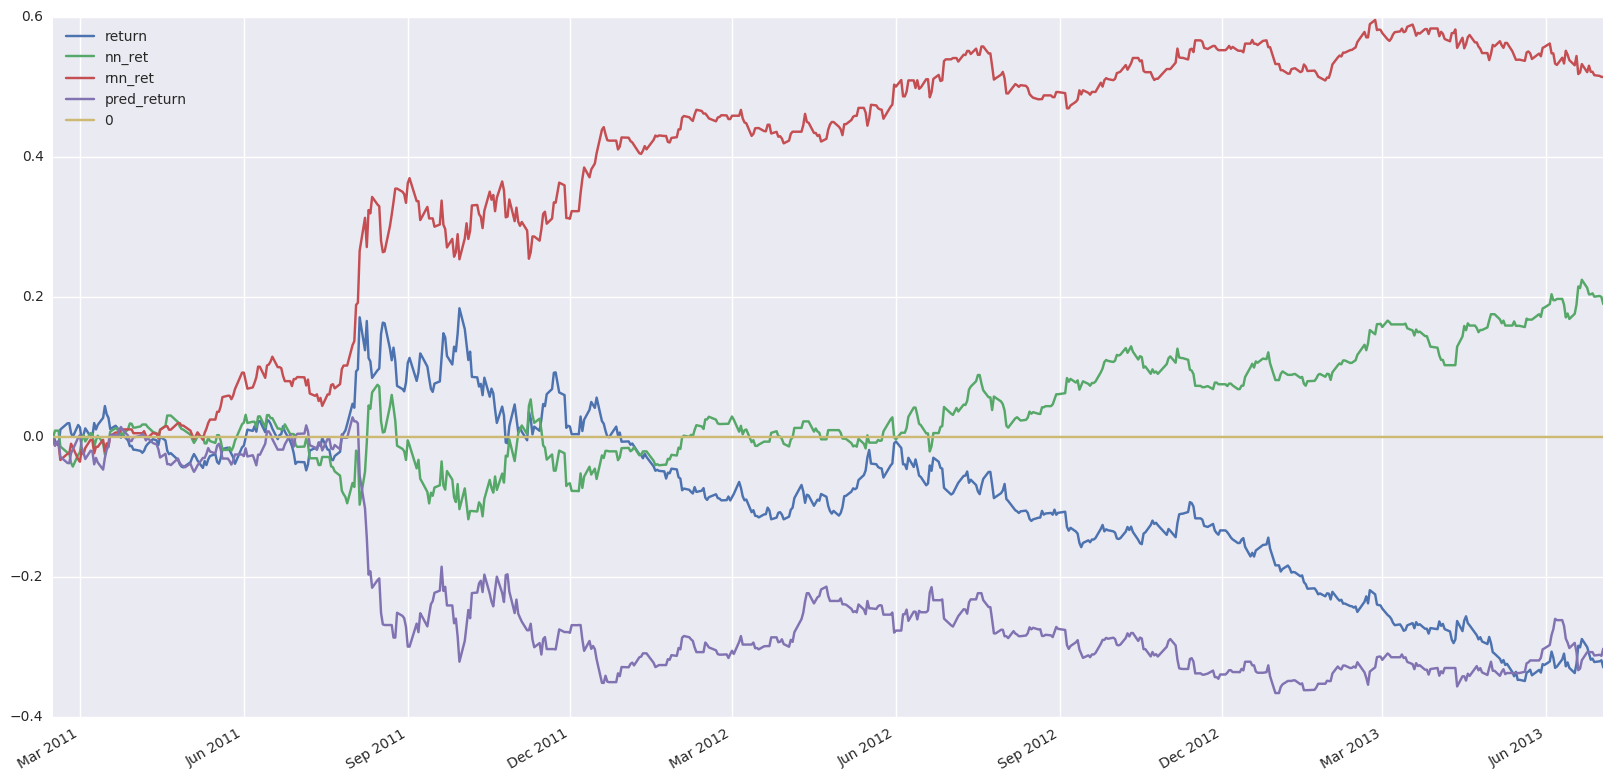

In [695]:
# https:/onepagecode.substack.com
Res = (Result[-test_size:][['return','nn_ret','rnn_ret','pred_return']]).cumsum()
Res[0] =0
Res.plot(figsize=(20,10))

This code takes a subset of a result dataset, containing columns 'return', 'nn_ret', 'rnn_ret', and 'pred_return' and calculates the cumulative sum for each column. It then sets the first value in the resulting cumulative sum to 0 and plots the result.

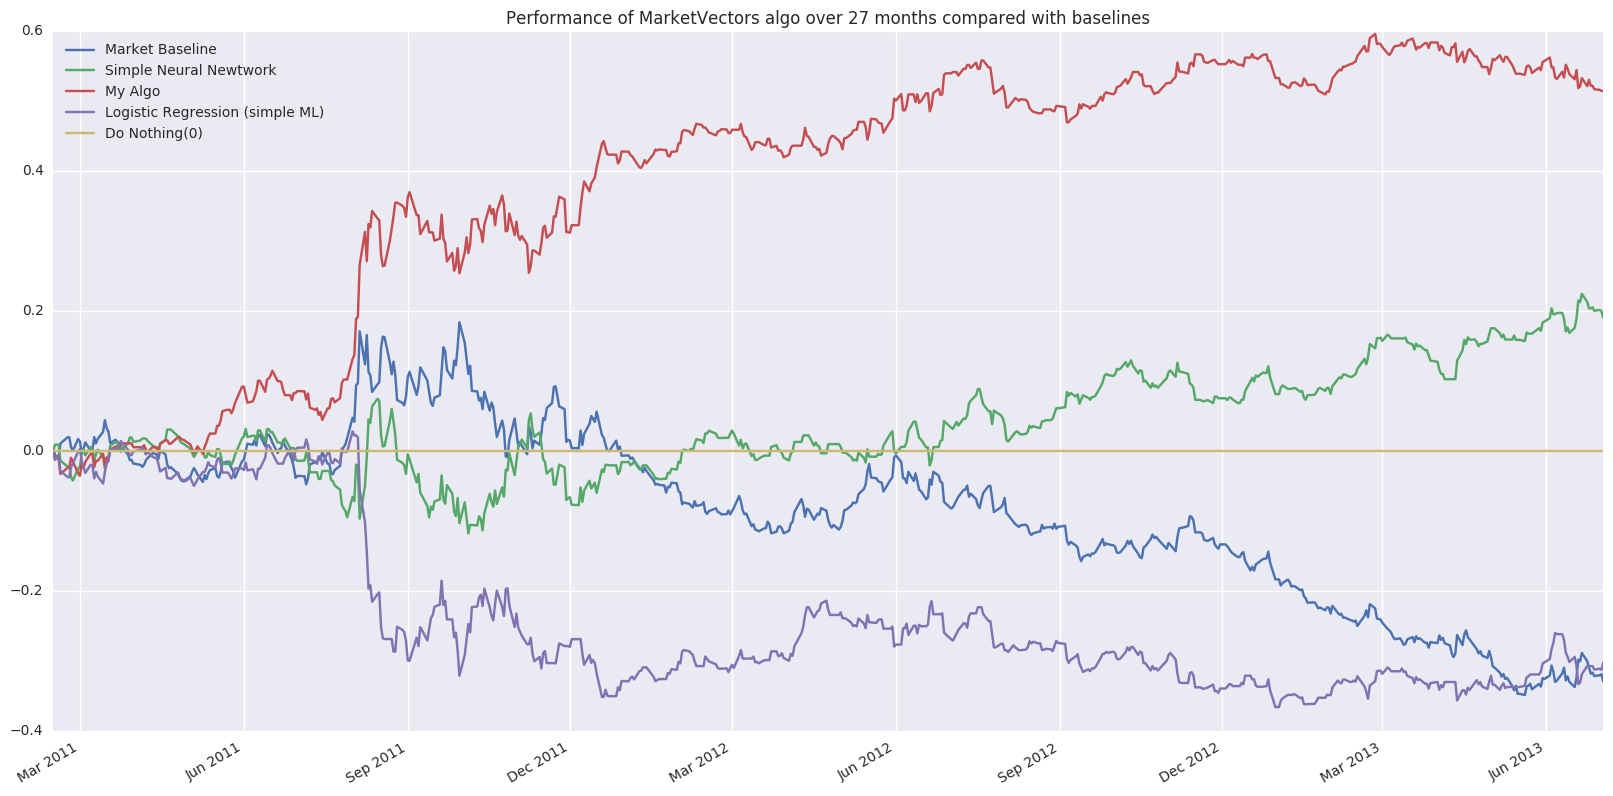

In [700]:
# https:/onepagecode.substack.com
Res.columns =['Market Baseline','Simple Neural Newtwork','My Algo','Logistic Regression (simple ML)','Do Nothing(0)']
Res.plot(figsize=(20,10),title="Performance of MarketVectors algo over 27 months compared with baselines")

This code sets the column names of a dataframe called "Res" to a list of different models, then plots the data from the dataframe with a specified figure size and title. The data being plotted is related to the performance of a "MarketVectors" algorithm over a period of 27 months, compared with different baseline models.

In [ ]:
# https:/onepagecode.substack.com
from tensorflow.python.ops.rnn_cell import BasicLSTMCell, GRUCell, MultiRNNCell, DropoutWrapper
cell = tf.nn.rnn_cell.GRUCell(num_units=RNN_HIDDEN_SIZE)
cell = MultiRNNCell(cells=[cell]*NUM_LAYERS,state_is_tuple=True)
attn_cell =tf.contrib.rnn.AttentionCellWrapper(cell=cell,attn_length=ATTN_LENGTH,state_is_tuple=True)
print(attn_cell.zero_state(batch_size=1,dtype=tf.float32))

This code imports BasicLSTMCell, GRUCell, MultiRNNCell, DropoutWrapper from the tensorflow.python.ops.rnn_cell library. It then creates a GRUCell with a specified number of hidden units and wraps it in a MultiRNNCell with a defined number of layers. The code then creates an AttentionCellWrapper using the previously defined cell and specified attention length, and prints the zero state of the cell with a batch size of 1 and data type of float32.

In [ ]:
# https:/onepagecode.substack.com
model.start_state

The code uses the python programming language to access the Substack webpage for the "onepagecode" model and retrieve information about its start state. This information could be related to the model's initial condition or starting point.

In [ ]:
# https:/onepagecode.substack.com
sess = tf.InteractiveSession()

This code creates a variable named "sess" and assigns it the value of an interactive session from the "tf" module in Python.

In [ ]:
# https:/onepagecode.substack.com
x = ([1,2,3,4],())
y = sum([1,2,3],())
type(())

This code assigns a list of numbers [1, 2, 3, 4] to the variable x, and an empty tuple to the variable y. It then uses the sum function to calculate the sum of the list [1, 2, 3] and assigns it to y. Finally, the type function is used to determine the data type of the empty tuple and returns the result.

In [ ]:
# https:/onepagecode.substack.com
Labeled.hist(column='return',by='class')

This code creates a histogram plot of the column 'return' grouped by the different values in the 'class' column.

In [ ]:
# https:/onepagecode.substack.com
Result['class'].unique()

This code accesses the 'class' column in the Result data and returns a list of unique values in that column.

In [ ]:
# https:/onepagecode.substack.com
import seaborn as sns
g = sns.FacetGrid(Result, row="class", col="rnn_pred", margin_titles=True)
g.map(sns.distplot, "return",);

This code imports the library "seaborn" and creates a "FacetGrid" object called "g" using the data from the "Result" variable. The grid is organized into rows and columns based on the class and rnn_pred variables. The code then uses the "map" function to plot a distribution plot of the "return" variable in each row and column of the grid.

In [ ]:
# https:/onepagecode.substack.com
Result.hist(by=['class','nn_pred'],column='return',sharex=True)

This code creates a histogram with 'class' and 'nn_pred' as the categories and 'return' as the column values. It then shares the x-axis for all categories.